<a href="https://colab.research.google.com/github/zachmakki15/IDS/blob/main/Project4_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Intro Data Science

Project #4

Problem #1

03/20/2022

Allow for mix of python and R code

In [3]:
%load_ext rpy2.ipython

#Problem 1

##Import Dataset

Import the dataset using pandas in python and dataframe in R

In [1]:
#Import the needed python libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import the dataset in python
dataFrame = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14797 non-null  int64 
 1   workclass       14797 non-null  object
 2   education       14797 non-null  int64 
 3   marital-status  14797 non-null  object
 4   occupation      14797 non-null  object
 5   sex             14797 non-null  object
 6   capital-gain    14797 non-null  int64 
 7   capital-loss    14797 non-null  int64 
 8   income          14797 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [4]:
#Import the dataset in R
%%R

library(readr)
rDataFrame <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)
summary(rDataFrame)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

##Workclass and Sex Contingency Table Bar Plot

Display a bar graph of a cross tabulation between the workclass and sex attributes in both Python and R

In [5]:
#Python
dataFrame['workclass'].value_counts()

Private             10281
Self-emp-not-inc     1170
Local-gov             969
?                     829
State-gov             586
Self-emp-inc          498
Federal-gov           454
Without-pay             5
Never-worked            5
Name: workclass, dtype: int64

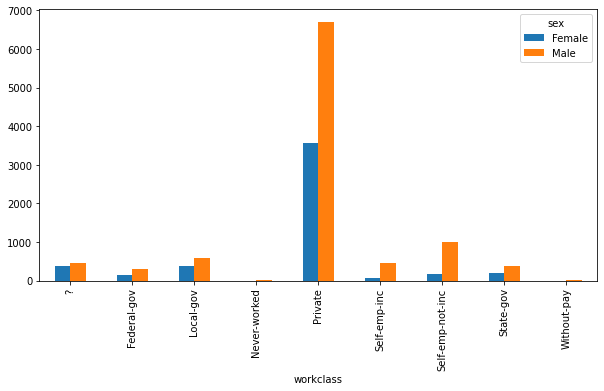

In [6]:
#Python contingency table
crossTab = pd.crosstab(dataFrame.workclass, dataFrame.sex)
pythonBarPlot = crossTab.plot.bar(figsize=(10,5))

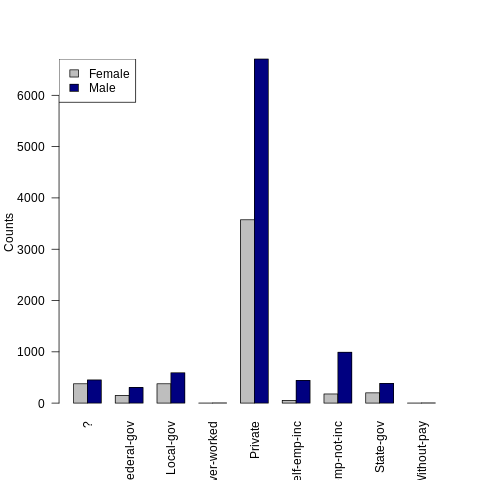

In [7]:
#R contingency table
%%R

rCrossTab <- table(rDataFrame$sex, rDataFrame$workclass)
colors <- c("grey", "navy")

barplot(rCrossTab, col = colors, ylab="Counts", las = 2, beside = TRUE)
legend("topleft", legend = c("Female", "Male"), fill = colors)

The results of the graph show that the the category Private makes up a large portion of the workclass attribute, and that the gender attribute is not evenly distributed between male and female with there being more entries for male then female. Overall not much can be taken from this cross tabulation other then the majority of samples in this dataset work in the private sector and are male.

##Sex and Marital Status Contingency Table Bar Plot

Display a bar graph of a cross tabulation between the sex and marital-status attributes in both Python and R

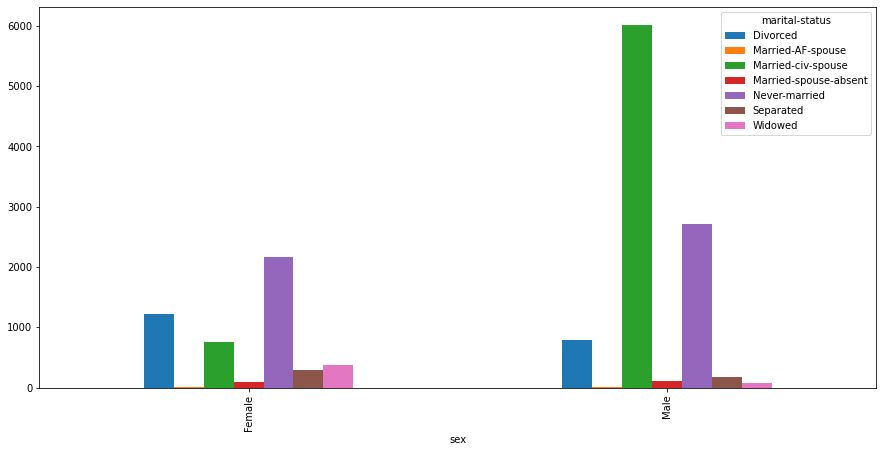

In [8]:
#Python contingency table
crossTab = pd.crosstab(dataFrame['sex'], dataFrame['marital-status'])
pythonBarPlot = crossTab.plot.bar(figsize=(15,7))

In [9]:
dataFrame['marital-status'].value_counts()

Married-civ-spouse       6771
Never-married            4877
Divorced                 2014
Separated                 472
Widowed                   453
Married-spouse-absent     199
Married-AF-spouse          11
Name: marital-status, dtype: int64

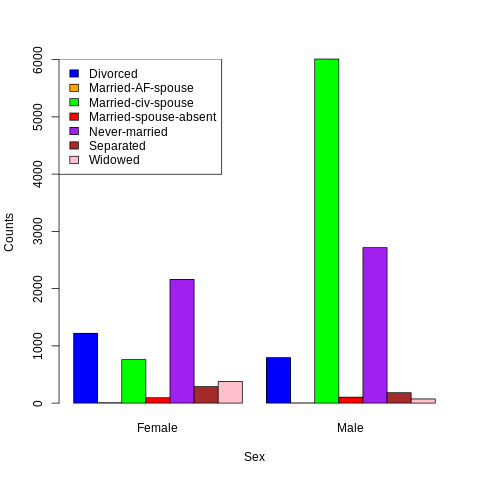

In [10]:
#R contingency table
%%R

rCrossTab <- table(rDataFrame[["marital-status"]], rDataFrame$sex)
colors <- c("blue", "orange", "green", "red", "purple", "brown", "pink")

barplot(rCrossTab, col = colors, beside = TRUE, xlab="Sex", ylab="Counts")
legend("topleft", legend = c("Divorced", "Married-AF-spouse", "Married-civ-spouse", "Married-spouse-absent", 
                             "Never-married", "Separated", "Widowed"), fill = colors)

The bar graphs above show that in this dataset the majority of male are matrial status category Married-Civ-Spouse, while the majortiy of females are martial status category Never-Married. One hypothesis I have after seeing that is it is likely that the average age of females in this dataset is slightly lower then the avergae age of the males.

##Get all values over 40, re-create last contingency table

The last cross tabulation bar plot will be re-plotted this time with only samples in the dataset that have an age greater then 40.

In [11]:
#Python create new data frame
dataFrame_over40 = dataFrame.query('age > 40')
dataFrame_over40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6144 entries, 0 to 14795
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6144 non-null   int64 
 1   workclass       6144 non-null   object
 2   education       6144 non-null   int64 
 3   marital-status  6144 non-null   object
 4   occupation      6144 non-null   object
 5   sex             6144 non-null   object
 6   capital-gain    6144 non-null   int64 
 7   capital-loss    6144 non-null   int64 
 8   income          6144 non-null   object
dtypes: int64(4), object(5)
memory usage: 480.0+ KB


In [12]:
#R create new data frame
%%R

rDataFrame_over40 = subset(rDataFrame, age > 40)
summary(rDataFrame_over40)

      age         workclass           education     marital-status    
 Min.   :41.00   Length:6144        Min.   : 1.00   Length:6144       
 1st Qu.:45.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :50.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :52.08                      Mean   :10.15                     
 3rd Qu.:57.00                      3rd Qu.:13.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss   
 Length:6144        Length:6144        Min.   :    0   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.0  
 Mode  :character   Mode  :character   Median :    0   Median :   0.0  
                                       Mean   : 1598   Mean   : 115.3  
                                       3rd Qu.:    0   3rd Qu.:   0.0  
                                       Max.   :99999   Max.   :4356.0  

In [13]:
dataFrame_over40['marital-status'].value_counts()

Married-civ-spouse       3688
Divorced                 1168
Never-married             571
Widowed                   425
Separated                 207
Married-spouse-absent      85
Name: marital-status, dtype: int64

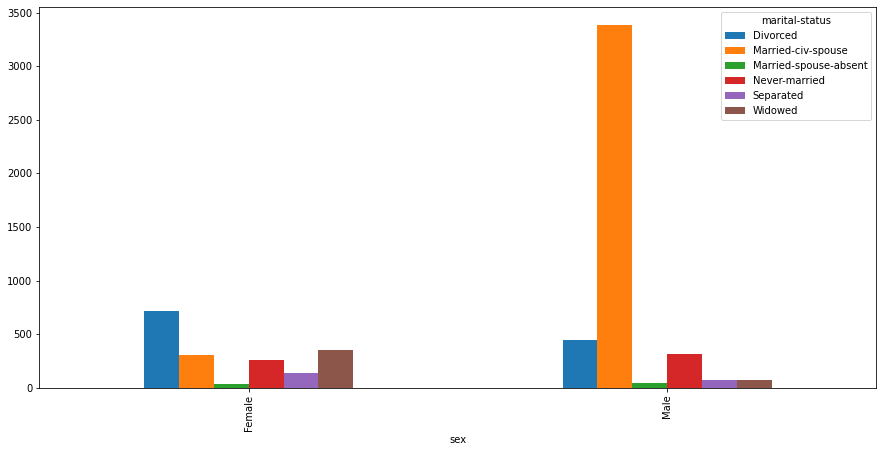

In [14]:
#Python contiegency table using over 40 data
crossTab_over40 = pd.crosstab(dataFrame_over40['sex'], dataFrame_over40['marital-status'])
pythonBarPlot_over40 = crossTab_over40.plot.bar(figsize=(15,7))

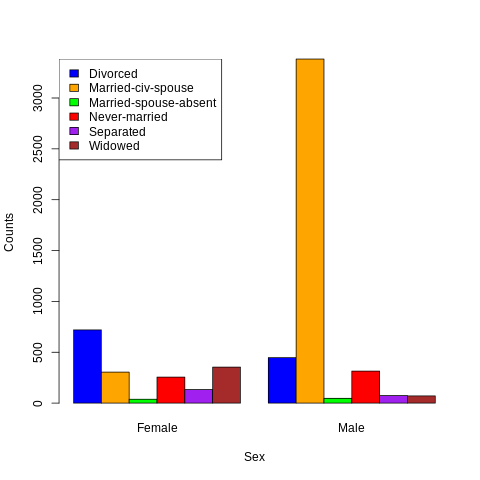

In [15]:
#R contingency table
%%R

rCrossTab <- table(rDataFrame_over40[["marital-status"]], rDataFrame_over40$sex)
colors <- c("blue", "orange", "green", "red", "purple", "brown")

barplot(rCrossTab, col = colors, beside = TRUE, xlab="Sex", ylab="Counts")
legend("topleft", legend = c("Divorced", "Married-civ-spouse", "Married-spouse-absent", 
                             "Never-married", "Separated", "Widowed"), fill = colors)

The results of this graph somewhat reinforces my thoughts from the previous graph. The overwhelming majority of samples in this dataset over the age of 40 are male martial status Married-Civ-Spouse. The lack of samples over 40 which are female could make the results of any study done on this data to be more representivtive of older males then females. 

##Education Attribute Outliers



To find outliers in an attribute it is easier to first normalize the attribute using the standard scalar, this then allows the user to identify outliers simply be searching for values greater then three or less then neagtive three. 

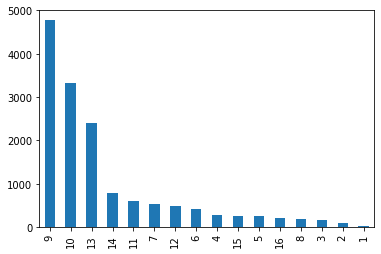

In [16]:
dataFrame['education'].value_counts().plot.bar()

In [17]:
#Identify outliers in education column, python
#To best idenitfy outliers first normalize column with standard scalar
from sklearn.preprocessing import StandardScaler
myscalar = StandardScaler()
education_norm = myscalar.fit_transform(np.array(dataFrame['education']).reshape(-1,1))

#Identify the outliers
dataFrame['education_scaled'] = pd.DataFrame(education_norm)
df_ed_outliers = dataFrame.query('education_scaled > 3 | education_scaled < -3')
df_ed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 72 to 14724
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               113 non-null    int64  
 1   workclass         113 non-null    object 
 2   education         113 non-null    int64  
 3   marital-status    113 non-null    object 
 4   occupation        113 non-null    object 
 5   sex               113 non-null    object 
 6   capital-gain      113 non-null    int64  
 7   capital-loss      113 non-null    int64  
 8   income            113 non-null    object 
 9   education_scaled  113 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.7+ KB


The results above show that 113 outliers were identified in the education attribute.

In [18]:
#R Identify outliers in education column
#To best idenitfy outliers first normalize column with scale
%%R

rDataFrame$scaled_education <- scale(x = rDataFrame$education)
rDataFrame_educationOutliers <- subset(rDataFrame, scaled_education > 3 | scaled_education < -3)
summary(rDataFrame_educationOutliers)

      age         workclass           education     marital-status    
 Min.   :19.00   Length:113         Min.   :1.000   Length:113        
 1st Qu.:33.00   Class :character   1st Qu.:2.000   Class :character  
 Median :46.00   Mode  :character   Median :2.000   Mode  :character  
 Mean   :45.87                      Mean   :1.788                     
 3rd Qu.:57.00                      3rd Qu.:2.000                     
 Max.   :90.00                      Max.   :2.000                     
  occupation            sex             capital-gain      capital-loss    
 Length:113         Length:113         Min.   :    0.0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0.0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0.0   Median :   0.00  
                                       Mean   :  539.5   Mean   :  63.47  
                                       3rd Qu.:    0.0   3rd Qu.:   0.00  
                                       Max.   :41310.

Using the scale command in R we can confirm that there are 113 outliers in the education attribute. These results also show that the outliers are all less then negative three, indicating that all the outliers in this dataset are on the lower end (much less then the average)

##Age Attribute Outliers

The same thing will now be done for the age attribute.

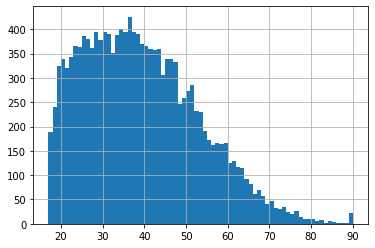

In [19]:
dataFrame['age'].hist(bins=73)

In [20]:
#Now do the same for the age attribute
#Python
myscalar = StandardScaler()
age_norm = myscalar.fit_transform(np.array(dataFrame['age']).reshape(-1,1))

#Identify the outliers
dataFrame['age_scaled'] = pd.DataFrame(age_norm)
df_age_outliers = dataFrame.query('age_scaled > 3 | age_scaled < -3')
df_age_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 99 to 14766
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               60 non-null     int64  
 1   workclass         60 non-null     object 
 2   education         60 non-null     int64  
 3   marital-status    60 non-null     object 
 4   occupation        60 non-null     object 
 5   sex               60 non-null     object 
 6   capital-gain      60 non-null     int64  
 7   capital-loss      60 non-null     int64  
 8   income            60 non-null     object 
 9   education_scaled  60 non-null     float64
 10  age_scaled        60 non-null     float64
dtypes: float64(2), int64(4), object(5)
memory usage: 5.6+ KB


The results above show that 60 outliers were identified in the age attribute.

In [21]:
#R
%%R

rDataFrame$scaled_age <- scale(x = rDataFrame$age)
rDataFrame_ageOutliers <- subset(rDataFrame, scaled_age > 3 | scaled_age < -3)
summary(rDataFrame_ageOutliers)

      age         workclass           education      marital-status    
 Min.   :80.00   Length:60          Min.   : 2.000   Length:60         
 1st Qu.:81.75   Class :character   1st Qu.: 6.750   Class :character  
 Median :84.50   Mode  :character   Median : 9.000   Mode  :character  
 Mean   :85.35                      Mean   : 9.183                     
 3rd Qu.:90.00                      3rd Qu.:13.000                     
 Max.   :90.00                      Max.   :16.000                     
  occupation            sex             capital-gain    capital-loss 
 Length:60          Length:60          Min.   :    0   Min.   :   0  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0  
 Mode  :character   Mode  :character   Median :    0   Median :   0  
                                       Mean   :  687   Mean   : 149  
                                       3rd Qu.:    0   3rd Qu.:   0  
                                       Max.   :20051   Max.   :4356  
    in

Here again the results are confirmed with R and we can see that all the outliers in the age attribute fall on the higher end of the values (much more then the average)

Since we can see from above that the outliers are all on the higher end, to find the most extreme outlier the max outlier (and its entire sample) will be taken from the dataFrame

In [22]:
#Identify most extreme outlier
df_mt_outlier = df_age_outliers[df_age_outliers['age_scaled']==df_age_outliers['age_scaled'].max()]
df_mt_outlier

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,education_scaled,age_scaled
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.411359,3.751354
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,-0.411359,3.751354
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.128163,3.751354
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,-0.026479,3.751354
2420,90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,-1.950881,3.751354
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K,1.513043,3.751354
2877,90,Self-emp-not-inc,13,Married-civ-spouse,Prof-specialty,Male,10566,0,<=50K,1.128163,3.751354
4114,90,?,9,Widowed,?,Female,0,4356,<=50K,-0.411359,3.751354
4680,90,Self-emp-not-inc,10,Married-civ-spouse,Farming-fishing,Male,0,0,<=50K,-0.026479,3.751354
5481,90,Private,13,Never-married,Exec-managerial,Male,0,0,<=50K,1.128163,3.751354


In [23]:
#R identify most extreme outlier
%%R

r_df_mt_outliers <- rDataFrame_ageOutliers[rDataFrame_ageOutliers$scaled_age == max(rDataFrame_ageOutliers$scaled_age),]
r_df_mt_outliers

# A tibble: 23 × 11
     age workclass    education `marital-status` occupation sex   `capital-gain`
   <dbl> <chr>            <dbl> <chr>            <chr>      <chr>          <dbl>
 1    90 Private              9 Never-married    Other-ser… Male               0
 2    90 Private              9 Never-married    Other-ser… Fema…              0
 3    90 Private             13 Married-civ-spo… Exec-mana… Male               0
 4    90 Private             10 Never-married    Other-ser… Male               0
 5    90 Private              5 Never-married    Adm-cleri… Fema…              0
 6    90 Local-gov           14 Married-civ-spo… Exec-mana… Male           20051
 7    90 Self-emp-no…        13 Married-civ-spo… Prof-spec… Male           10566
 8    90 ?                    9 Widowed          ?          Fema…              0
 9    90 Self-emp-no…        10 Married-civ-spo… Farming-f… Male               0
10    90 Private             13 Never-married    Exec-mana… Male               0
# … with

The results above show a larger number of 90 year olds in this study then would have been expected. The dataset is rather large though so it may be possible that overall it contains a larger amount of elderly samples then orginally expected. The only common factor between the outlier samples is the workclass is majority private (which from the results shown above matches the rest of the dataset) and the income is majority under 50k.

To find out more about the eldery samples in this dataset a subset will be created of only samples above age 80 and the distribution of the subset will then be plotted with a histogram.

In [24]:
#Python histogram of all ages over 80
dataFrame_over80 = dataFrame.query('age > 80')
dataFrame_over80.describe()

,age,education,capital-gain,capital-loss,education_scaled,age_scaled
count,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000
mean,86.420000,8.98000,612.34000,178.780000,-0.419057,3.489627
std,3.676123,3.59983,3178.16191,754.485723,1.385504,0.268754
min,81.000000,2.00000,0.00000,0.000000,-3.105523,3.093383
25%,82.250000,6.75000,0.00000,0.000000,-1.277341,3.184768
50%,87.500000,9.00000,0.00000,0.000000,-0.411359,3.568584
75%,90.000000,12.75000,0.00000,0.000000,1.031942,3.751354
max,90.000000,15.00000,20051.00000,4356.000000,1.897924,3.751354


In [25]:
#R histogram of all ages over 80
%%R

rDataFrame_over80 <- subset(rDataFrame, age > 80)
summary(rDataFrame_over80)

      age         workclass           education     marital-status    
 Min.   :81.00   Length:50          Min.   : 2.00   Length:50         
 1st Qu.:82.25   Class :character   1st Qu.: 6.75   Class :character  
 Median :87.50   Mode  :character   Median : 9.00   Mode  :character  
 Mean   :86.42                      Mean   : 8.98                     
 3rd Qu.:90.00                      3rd Qu.:12.75                     
 Max.   :90.00                      Max.   :15.00                     
  occupation            sex             capital-gain      capital-loss   
 Length:50          Length:50          Min.   :    0.0   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:    0.0   1st Qu.:   0.0  
 Mode  :character   Mode  :character   Median :    0.0   Median :   0.0  
                                       Mean   :  612.3   Mean   : 178.8  
                                       3rd Qu.:    0.0   3rd Qu.:   0.0  
                                       Max.   :20051.0   Ma

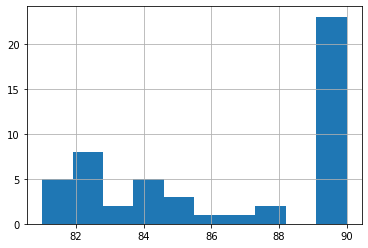

In [34]:
#Python histogram
dataFrame_over80.age.hist()

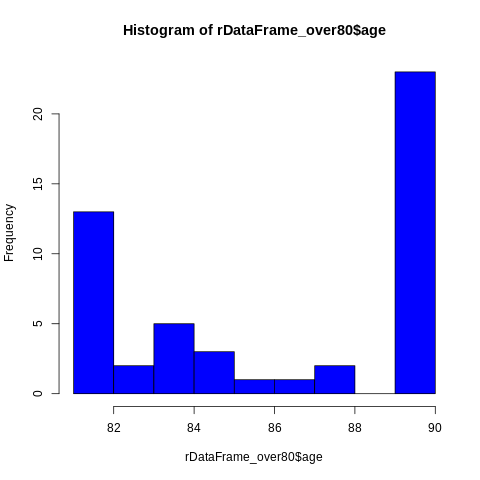

In [33]:
#R histogram
%%R

hist(rDataFrame_over80$age, col="blue")

The histograms results above are odd because they do not match even though the subsets are both the same size, and from the results of the R summary command and the python describe commad have the exact same max, min, and mean for there age attributes. I am somewhat new to R and may have made a mistake in the histogram plot that I am unaware of. From looking at just the python histogram we can see that the majority of samples over 80 in the dataset are age 90, which is strange. If the elderly population was sampled one would assume the age distribution would be less concentrated. One hypothesis that can be made is that age 90 may be used to represent ages which are unknown in this dataset. 

**Summary**

The findings of the above report can be summarized as follows:

The first cross tabulation of workclass and gender showed that there are more males sampled in the dataset then females and that the majority of the people sampled work in the private sector.

The next cross tabulation of gender and martial status showed that majority of male are matrial status category Married-Civ-Spouse, while the majortiy of females are martial status category Never-Married.

The next cross tabulation was the same as the one above but only for sample greater age 40, this confirmed an earlier hypothesis that the majority of samples over 40 in the dataset were male.

Outliers were found in both the education and the age column, the ages columns outliers were skewed with the majority of extreme outliers (above age 80) being the same age (90). This may indicate that the age 90 is used when an age is unknown, or is as high as the dataset goes (91, 91... would just be 90). 